In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/adjusted ozone regime.csv')

In [ ]:
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]
# We excluded the two regions: Singapore and Vancouver as they overlap with neighbouring areas due to the coarse spatial resolution

In [6]:
list(data)

['region',
 'LER',
 'LER_NOx',
 'LER_NOx2',
 'FNR_NO2',
 'FNR_NOx',
 'FNR_NOy',
 'VOC_NOx',
 'O3_NOy',
 'O3_HNO3',
 'HOP',
 'Region',
 'Sn',
 'Sn_err',
 'Sv',
 'Sv_err',
 'SnSv',
 'R2',
 'ln_LER',
 'ln_LER_NOx',
 'ln_LER_NOx2',
 'ln_FNR_NO2',
 'ln_FNR_NOx',
 'ln_FNR_NOy',
 'ln_VOC_NOx',
 'ln_HOP',
 'SnSv_adj',
 'ln_LER_NOx_adj',
 'LER_NOx_adj',
 'ln_LER_NOx2_adj',
 'LER_NOx2_adj',
 'ln_HOP_adj',
 'HOP_adj',
 'k_regime',
 'Sn_adj',
 'Sv_adj']

#### Add on information of regional concentrations

In [ ]:
data_raw = pd.read_csv('/Users/csuen/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions.csv')

In [28]:
data_raw['o3net_mole'] = (data_raw['o3prod_mole_stacked'] - data_raw['o3loss_mole_stacked'])*10**(-7)
data_raw['o3_ppb'] = data_raw['o3']*10**9

In [29]:
data_supp = data_raw.groupby('region').mean()[['o3net_mole', 'o3_ppb']]

In [31]:
data_supp.to_csv('data_supp_temp.csv')
data_supp = pd.read_csv('data_supp_temp.csv')

In [32]:
data = data.merge(data_supp, how='left', left_on=['region'], right_on=['region'])
data

,region,Sn,Sn_err,Sv,Sv_err,Sn_adj,Sv_adj,SnSv,SnSv_adj,LER_NOx,...,FNR_NOy,VOC_NOx,ln_LER_NOx_adj,LER_NOx_adj,ln_LER_NOx2_adj,LER_NOx2_adj,ln_HOP_adj,HOP_adj,o3net_mole,o3_ppb
0,AUS,0.678558,0.138674,0.729637,0.056665,0.744778,0.664763,0.929994,1.120367,3.664200e-04,...,0.282332,5.233270,-7.352209,6.411750e-04,-1.372293,0.253525,-1.131756,0.322467,0.308446,21.908209
1,BRA,1.039605,0.050838,0.376353,0.101639,0.834819,0.468674,2.762317,1.781234,2.417422e-02,...,3.453524,98.626424,-5.079875,6.220685e-03,0.804395,2.235345,-0.281708,0.754494,0.714427,21.903138
2,BTH,-9.901132,0.183759,4.863086,0.174193,-2.407485,1.250009,-2.035977,-1.925973,2.740000e-07,...,0.015405,0.429687,-14.192869,6.860000e-07,-5.927205,0.002666,-3.714724,0.024362,0.537186,21.578030
3,CA,-0.437245,0.274061,1.664630,0.067024,-0.381208,1.909329,-0.262668,-0.199655,1.450000e-05,...,0.071310,1.086755,-9.735847,5.910000e-05,-3.041840,0.047747,-2.133595,0.118411,0.484890,32.774687
4,CCE,0.344900,0.084865,1.208617,0.033495,0.587435,0.709613,0.285367,0.827826,1.937150e-04,...,0.105618,3.022450,-7.992975,3.378270e-04,-1.731722,0.176979,-1.845450,0.157954,1.264232,33.468971
5,COD,0.388597,0.018685,0.182689,0.144989,0.427635,0.166012,2.127096,2.575935,1.554839e-02,...,2.704649,86.086558,-3.991055,1.848020e-02,1.625091,5.078883,-0.139673,0.869642,1.127334,29.898853
6,DEU,-1.182926,0.282724,2.000965,0.089983,-1.250963,1.892137,-0.591178,-0.661138,1.600000e-05,...,0.054576,0.556930,-11.029927,1.620000e-05,-4.096335,0.016634,-2.437088,0.087415,0.246930,24.981628
7,FIN,0.159276,0.331664,1.598572,0.108084,0.244514,1.041305,0.099636,0.234815,7.643560e-04,...,0.230105,3.494706,-8.492461,2.050080e-04,-2.219384,0.108676,-1.424540,0.240619,0.129667,22.499470
8,FRA,0.466664,0.080890,1.024897,0.032964,0.479052,0.998393,0.455327,0.479823,1.447710e-04,...,0.131786,1.932617,-8.615121,1.813430e-04,-2.316312,0.098637,-1.680430,0.186294,0.379836,29.816768
9,GBA,0.147599,0.099539,1.497546,0.056190,0.214859,1.028754,0.098561,0.208854,3.090000e-05,...,0.111089,2.103838,-10.137074,3.960000e-05,-3.048422,0.047434,-2.427075,0.088295,1.775808,32.034829


In [33]:
data_sens = data[['region', 'o3net_mole', 'o3_ppb', 'Sn_adj', 'Sn_err', 'Sv_adj', 'Sv_err', 'SnSv_adj']]
data_sens

,region,o3net_mole,o3_ppb,Sn_adj,Sn_err,Sv_adj,Sv_err,SnSv_adj
0,AUS,0.308446,21.908209,0.744778,0.138674,0.664763,0.056665,1.120367
1,BRA,0.714427,21.903138,0.834819,0.050838,0.468674,0.101639,1.781234
2,BTH,0.537186,21.578030,-2.407485,0.183759,1.250009,0.174193,-1.925973
3,CA,0.484890,32.774687,-0.381208,0.274061,1.909329,0.067024,-0.199655
4,CCE,1.264232,33.468971,0.587435,0.084865,0.709613,0.033495,0.827826
5,COD,1.127334,29.898853,0.427635,0.018685,0.166012,0.144989,2.575935
6,DEU,0.246930,24.981628,-1.250963,0.282724,1.892137,0.089983,-0.661138
7,FIN,0.129667,22.499470,0.244514,0.331664,1.041305,0.108084,0.234815
8,FRA,0.379836,29.816768,0.479052,0.080890,0.998393,0.032964,0.479823
9,GBA,1.775808,32.034829,0.214859,0.099539,1.028754,0.056190,0.208854


In [ ]:
data_sens.to_csv('Fig. 4b SnSv sensitivities scatter plot.csv', index=False)

([<matplotlib.axis.YTick at 0x7fb5853dd1f0>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

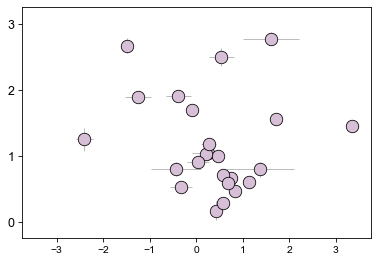

In [39]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=75)
x_values = data_sens['Sn_adj']
y_values = data_sens['Sv_adj']
x_errors = data_sens['Sn_err']
y_errors = data_sens['Sv_err']

plt.errorbar(x_values, y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='thistle', mec='black', ms=12, alpha=1, mew=0.75)

plt.xlim([-3.75,3.75])
plt.ylim([-0.25,3.25])
plt.yticks([0,1,2,3], fontsize=12)
#plt.xticks([0,2,4,6], fontsize=12)

([<matplotlib.axis.XTick at 0x7fb5874a7af0>,
 [Text(-4, 0, '−4'),
  Text(-2, 0, '−2'),
  Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4')])

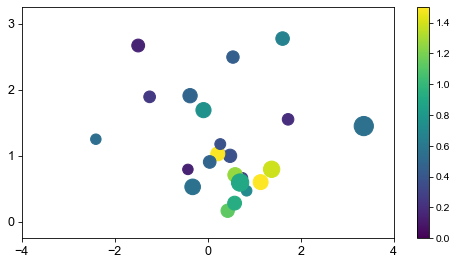

In [60]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=75)
x_values = data_sens['Sn_adj']
y_values = data_sens['Sv_adj']
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

plt.scatter(x_values, y_values, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

plt.colorbar()
plt.xlim([-4,4])
plt.ylim([-0.25,3.25])
plt.yticks([0,1,2,3], fontsize=12)
plt.xticks([-4,-2,0,2,4], fontsize=12)

In [95]:
x0 = np.zeros(20)
y0 = np.arange(-1,5,0.3)

x1 = np.arange(0,5,0.2)
y1 = x1/0.8
y2 = x1/1.2

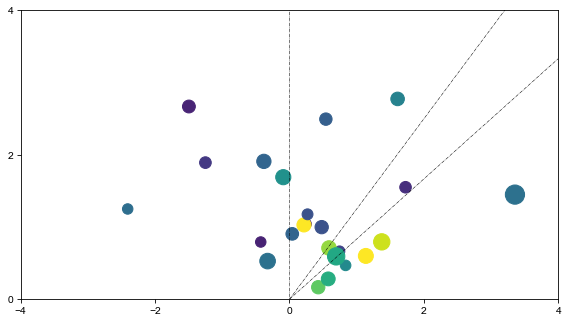

In [ ]:
fig, ax = plt.subplots(figsize=(9.25, 5), dpi=75)
x_values = data_sens['Sn_adj']
y_values = data_sens['Sv_adj']
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

plt.scatter(x_values, y_values, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")
plt.plot(x0, y0, linestyle='-.', linewidth=0.5, color="black")
plt.plot(x1, y1, linestyle='-.', linewidth=0.5, color="black")
plt.plot(x1, y2, linestyle='-.', linewidth=0.5, color="black")

#plt.colorbar()
plt.xlim([-4,4])
plt.ylim([0,4])
plt.yticks([0,2,4], fontsize=10)
plt.xticks([-4,-2,0,2,4], fontsize=10)

#plt.savefig("Fig. 4b SnSv sensitivities scatter plot.pdf", format="pdf", bbox_inches="tight")

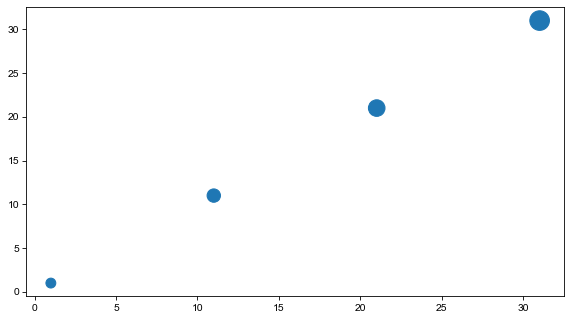

In [ ]:
## Determining the marker size 
fig, ax = plt.subplots(figsize=(9.25, 5), dpi=75)
x = [1,11,21,31]
y = [1,11,21,31]
plt.scatter(x, y, s=[20**1.5,30**1.5,40**1.5,50**1.5])

plt.savefig("Fig. 4b marker size.pdf", format="pdf", bbox_inches="tight")

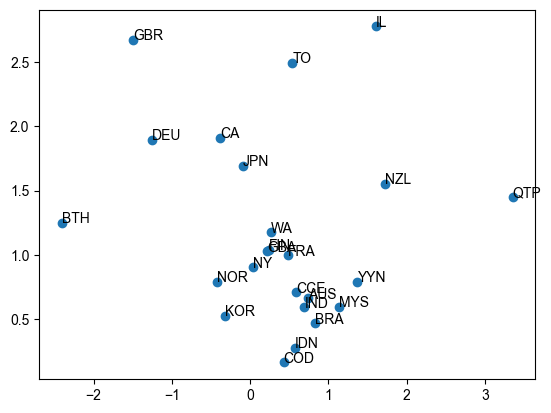

In [ ]:
### Add annotates to identify the representative regions
y = data_sens['Sv_adj']
z = data_sens['Sn_adj']
labels = data_sens['region']

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (z[i], y[i]))